# Importing libraries

In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn
import ast
import spacy
import string
import re
import nltk
import ast
import gensim
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.neural_network import MLPClassifier

# Importing selected models

In [2]:
fullname = "selected_models/14.02.2021_18.36/models.pickle"
file = open(fullname, "rb")
models = pickle.load(file)

In [3]:
models.all_memberships

{0: array([0.55876722, 0.        , 0.27214714, 1.        , 0.21707911,
        1.        , 0.        , 0.75806587, 0.72383457, 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.27657062, 0.5241428 , 0.        , 0.        , 0.        ,
        0.92535845, 0.        , 0.        , 0.        , 0.35643987,
        0.        , 0.77503117, 1.        , 0.36541311, 0.        ,
        1.        , 1.        , 0.        , 0.05039149, 0.86066787,
        0.        , 1.        , 1.        , 0.41858897, 0.53199194,
        0.        , 0.88018749, 0.94482976, 1.        , 1.        ,
        0.        , 0.        , 0.8198836 , 1.        , 0.31945478,
        1.        , 0.        , 0.        , 0.61264374, 0.70219674,
        0.        , 1.        , 0.79099459, 0.14722894, 0.77232987,
        1.        , 0.34954586, 1.        , 1.        , 0.4048937 ,
        0.        , 0.88306355, 0.964948  , 1.        , 1.        ,
        0.        , 0.9614489 , 0.        , 1

In [4]:
models.all_labels

{0: array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0]),
 1: array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 2: array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
        0, 

In [5]:
models.folds

{'x train 0': array([[ 1.0428438 , -0.5198634 ,  0.12646395, ...,  0.0444528 ,
         -0.62635076, -1.6725181 ],
        [ 0.49381587, -0.23826756,  0.24815886, ..., -0.2583773 ,
         -0.6557733 , -1.6598623 ],
        [-0.29052314, -0.02713703,  0.18784182, ..., -0.57735896,
         -0.791638  , -1.613893  ],
        ...,
        [ 0.52707887, -0.20401531,  0.23766214, ..., -0.38204902,
         -0.75623274, -1.6344525 ],
        [ 0.60953003, -0.3515984 ,  0.11522481, ..., -0.19174136,
         -0.6937208 , -1.6060658 ],
        [-0.04788761, -0.06390925,  0.13038637, ..., -0.5247063 ,
         -0.77975106, -1.6520321 ]]),
 'y train 0': array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0

In [6]:
all_memberships = models.all_memberships
memberships = []

for i in range(0,5):
    for j in all_memberships[i]:
        memberships.append(j)
        
memberships = pd.DataFrame(memberships)

In [7]:
memberships[0:10]

,0
0,0.558767
1,0.000000
2,0.272147
3,1.000000
4,0.217079
5,1.000000
6,0.000000
7,0.758066
8,0.723835
9,1.000000


In [8]:
all_training_memberships = models.all_training_memberships
training_memberships = []

for i in range(0,5):
    for j in all_training_memberships[i]:
        training_memberships.append(j)
        
training_memberships = pd.DataFrame(training_memberships)

In [9]:
training_memberships[0:10]

,0
0,1.000000
1,0.650066
2,0.000000
3,1.000000
4,0.305668
5,0.983126
6,1.000000
7,0.726066
8,1.000000
9,1.000000


In [10]:
all_labels = models.all_labels
labels = []

for i in range(0,5):
    for j in all_labels[i]:
        labels.append(j)
        
labels = pd.DataFrame(labels)

In [11]:
labels[0:10]

,0
0,0
1,0
2,0
3,1
4,0
5,1
6,0
7,1
8,1
9,1


## Retrieve expected memberships

In [12]:
PATH_TEXTS = "generated_datasets/14.02.2021_17.44/generated_dataset_500.csv"

# data loading
dataset = pd.read_csv(PATH_TEXTS)

In [13]:
all_memberships = models.all_memberships
all_folds = models.folds
memberships = []
folds = []

for i in range(0,5):
    for j, k in zip(all_memberships[i], all_folds["x test " + str(i)]):
        memberships.append(j)
        folds.append(k)

In [14]:
total_data = pd.DataFrame(folds)
total_data["x"] = total_data.values.tolist()
for i in range(0,len(total_data.columns) - 1):
    del total_data[i]

In [15]:
total_data["approximated memberships"] = memberships
total_data

,x,approximated memberships
0,"[0.34228808, -0.24853386, 0.06953525, -1.12669...",0.558767
1,"[-0.21283703, -0.11133902, 0.08087758, -1.0212...",0.000000
2,"[0.16090286, -0.16973428, 0.13026284, -1.03378...",0.272147
3,"[0.8087699, -0.4186009, -0.039123718, -1.20644...",1.000000
4,"[0.13339956, -0.13575827, 0.101804905, -1.0236...",0.217079
...,...,...
495,"[0.62736315, -0.3792561, 0.11983463, -1.146960...",0.912755
496,"[1.215556, -0.44440478, 0.22339088, -1.1728154...",1.000000
497,"[0.52707887, -0.20401531, 0.23766214, -1.06906...",0.628492
498,"[0.60953003, -0.3515984, 0.11522481, -1.122681...",0.807471


In [16]:
total_data["expected memberships"] = dataset["membership"]

In [17]:
total_data

,x,approximated memberships,expected memberships
0,"[0.34228808, -0.24853386, 0.06953525, -1.12669...",0.558767,0.457720
1,"[-0.21283703, -0.11133902, 0.08087758, -1.0212...",0.000000,0.158056
2,"[0.16090286, -0.16973428, 0.13026284, -1.03378...",0.272147,0.332429
3,"[0.8087699, -0.4186009, -0.039123718, -1.20644...",1.000000,0.819209
4,"[0.13339956, -0.13575827, 0.101804905, -1.0236...",0.217079,0.318341
...,...,...,...
495,"[0.62736315, -0.3792561, 0.11983463, -1.146960...",0.912755,0.702458
496,"[1.215556, -0.44440478, 0.22339088, -1.1728154...",1.000000,0.978176
497,"[0.52707887, -0.20401531, 0.23766214, -1.06906...",0.628492,0.521144
498,"[0.60953003, -0.3515984, 0.11522481, -1.122681...",0.807471,0.633253


In [18]:
all_training_memberships = models.all_training_memberships
all_folds = models.folds
training_memberships = []
folds = []

for i in range(0,5):
    for j, k in zip(all_training_memberships[i], all_folds["x train " + str(i)]):
        training_memberships.append(j)
        folds.append(k)

In [19]:
total_training_data = pd.DataFrame(folds)
total_training_data["x"] = total_training_data.values.tolist()
for i in range(0,len(total_training_data.columns) - 1):
    del total_training_data[i]

In [20]:
total_training_data["approximated memberships"] = training_memberships
total_training_data

,x,approximated memberships
0,"[1.0428438, -0.5198634, 0.12646395, -1.2517388...",1.000000
1,"[0.49381587, -0.23826756, 0.24815886, -1.07796...",0.650066
2,"[-0.29052314, -0.027137034, 0.18784182, -0.891...",0.000000
3,"[0.9049282, -0.38914347, 0.121224254, -1.16731...",1.000000
4,"[0.18619262, -0.04876464, 0.19429007, -1.03168...",0.305668
...,...,...
1995,"[0.5148643, -0.30977166, 0.16145097, -1.104984...",0.744916
1996,"[0.92804, -0.4211883, 0.052735094, -1.1648171,...",1.000000
1997,"[0.27893853, -0.15135854, 0.24330215, -1.01668...",0.354383
1998,"[-0.33626172, 0.0131562175, 0.16829377, -0.898...",0.000000


In [21]:
total_training_data["x"] = total_training_data["x"].apply(lambda s: tuple(s))
total_training_data

,x,approximated memberships
0,"(1.0428438, -0.5198634, 0.12646395, -1.2517388...",1.000000
1,"(0.49381587, -0.23826756, 0.24815886, -1.07796...",0.650066
2,"(-0.29052314, -0.027137034, 0.18784182, -0.891...",0.000000
3,"(0.9049282, -0.38914347, 0.121224254, -1.16731...",1.000000
4,"(0.18619262, -0.04876464, 0.19429007, -1.03168...",0.305668
...,...,...
1995,"(0.5148643, -0.30977166, 0.16145097, -1.104984...",0.744916
1996,"(0.92804, -0.4211883, 0.052735094, -1.1648171,...",1.000000
1997,"(0.27893853, -0.15135854, 0.24330215, -1.01668...",0.354383
1998,"(-0.33626172, 0.0131562175, 0.16829377, -0.898...",0.000000


In [22]:
total_training_data = total_training_data.drop_duplicates(subset=['x'])

In [23]:
dataset["text"] = dataset["text"].apply(lambda s: ast.literal_eval(s))
dataset["text"] = dataset["text"].apply(lambda s: tuple(s))
dataset

,index,old index,text,membership
0,0,361,"(0.34228808, -0.24853386, 0.06953525, -1.12669...",0.457720
1,1,73,"(-0.21283703, -0.11133902, 0.08087758, -1.0212...",0.158056
2,2,374,"(0.16090286, -0.16973428, 0.13026284, -1.03378...",0.332429
3,3,155,"(0.8087699, -0.4186009, -0.039123718, -1.20644...",0.819209
4,4,104,"(0.13339956, -0.13575827, 0.101804905, -1.0236...",0.318341
...,...,...,...,...
495,495,106,"(0.62736315, -0.3792561, 0.11983463, -1.146960...",0.702458
496,496,270,"(1.215556, -0.44440478, 0.22339088, -1.1728154...",0.978176
497,497,348,"(0.52707887, -0.20401531, 0.23766214, -1.06906...",0.521144
498,498,435,"(0.60953003, -0.3515984, 0.11522481, -1.122681...",0.633253


In [24]:
counter = 0
original_training_data_positions = []

for i in total_training_data.iterrows():
    for j in dataset.iterrows():
        if i[1]["x"] == j[1]["text"]:
            original_training_data_positions.append(j[0])

In [25]:
original_training_data = []

for i in original_training_data_positions:
    original_training_data.append(dataset["membership"].iloc[i])

In [26]:
total_training_data["expected memberships"] = original_training_data
total_training_data

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,x,approximated memberships,expected memberships
0,"(1.0428438, -0.5198634, 0.12646395, -1.2517388...",1.000000,0.952944
1,"(0.49381587, -0.23826756, 0.24815886, -1.07796...",0.650066,0.506925
2,"(-0.29052314, -0.027137034, 0.18784182, -0.891...",0.000000,0.058805
3,"(0.9049282, -0.38914347, 0.121224254, -1.16731...",1.000000,0.774822
4,"(0.18619262, -0.04876464, 0.19429007, -1.03168...",0.305668,0.367185
...,...,...,...
495,"(0.35742876, -0.22786662, 0.1088558, -1.075683...",0.569881,0.486763
496,"(0.2535611, -0.22119443, 0.1667321, -1.0215025...",0.436444,0.405137
497,"(-0.07508594, -0.056197986, 0.16212878, -0.991...",0.000000,0.175502
498,"(-0.0881107, -0.119064696, 0.19706906, -0.9449...",0.000000,0.211718


In [27]:
def plot_hist(data):
    plt.figure(figsize=(15, 7))
    weights = np.ones_like(data)/float(len(data))
    plt.hist(data, weights=weights)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.grid()

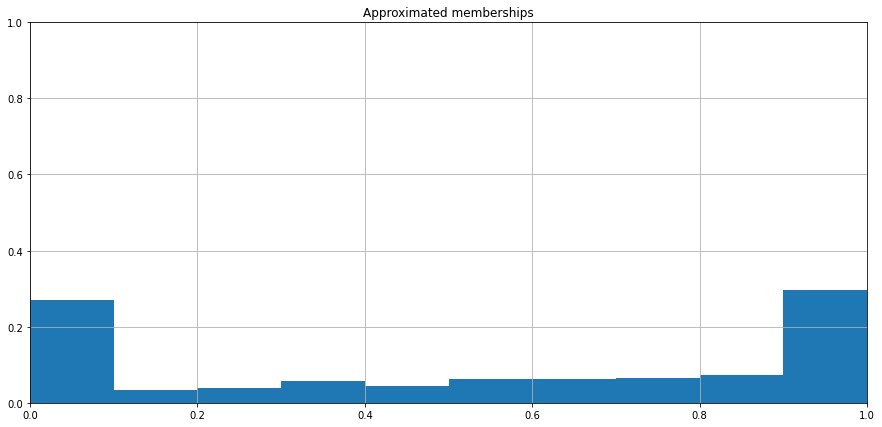

In [28]:
plot_hist(total_data["approximated memberships"])

plt.title("Approximated memberships")
plt.show()

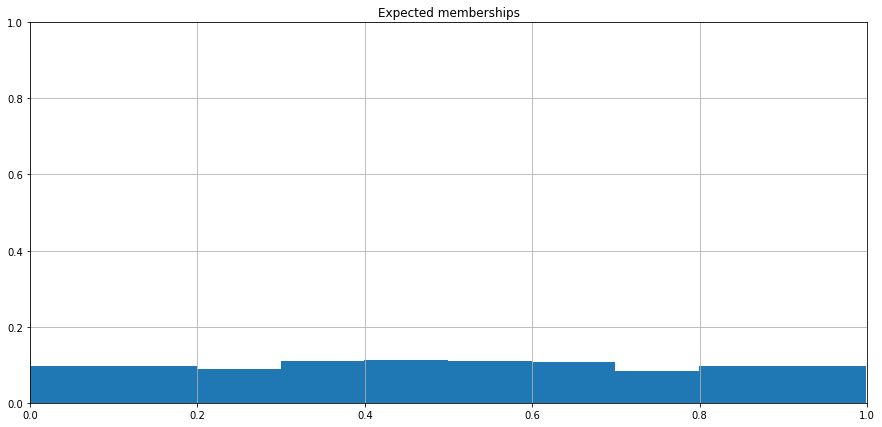

In [29]:
plot_hist(total_data["expected memberships"])

plt.title("Expected memberships")
plt.show()

In [30]:
def square_loss(prediction, y):
    return (y - prediction) ** 2

def MSE(prediction, y):
    loss = square_loss(prediction, y)
    return 1/len(loss) * sum(loss)

Training error

In [31]:
MSE(total_training_data["approximated memberships"], total_training_data["expected memberships"])

0.02398067403020008

Test error

In [32]:
MSE(total_data["approximated memberships"], total_data["expected memberships"])

0.037145574564748755

In [33]:
np.corrcoef(total_data["approximated memberships"], total_data["expected memberships"])[0][1]

0.9013414451808736

In [34]:
def select_radius(radius, threshold):
    special_range = [(approx[1], approx[2]) for x, approx in total_data.iterrows() if approx[1] <= threshold + radius and approx[1] >= threshold - radius]
    return special_range

In [35]:
for i in select_radius(0.15, 0.5):
    print(i)

(0.5587672192463357, 0.457719514662481)
(0.5241428027881151, 0.4448259148382305)
(0.3564398711942228, 0.3630687973211884)
(0.3654131116840612, 0.42479967355149095)
(0.41858897135921525, 0.41778946536047856)
(0.5319919386349197, 0.4804685317998239)
(0.6126437437857792, 0.4870434973101976)
(0.4048936973662568, 0.4100590747876023)
(0.47314124260321766, 0.4368978620838906)
(0.4509329960945635, 0.4123982214830445)
(0.5157378230426417, 0.463708165146801)
(0.571880844263345, 0.4791516703674598)
(0.5707678472067673, 0.4867625375530466)
(0.43718573183952303, 0.9529441287148503)
(0.6489284974727172, 0.34221148672800106)
(0.5911288073314152, 0.4878832739626526)
(0.4449015078438179, 0.4056794360940178)
(0.3817625618491236, 0.3672539095142833)
(0.5309363959413185, 0.4549487052534162)
(0.3598925376616954, 0.359500955354634)
(0.5138202848592813, 0.4876763389160194)
(0.5796991935786527, 0.4809136208799497)
(0.5157608896777726, 0.4379515369122369)
(0.40816311716167275, 0.4119696899428398)
(0.4151638967

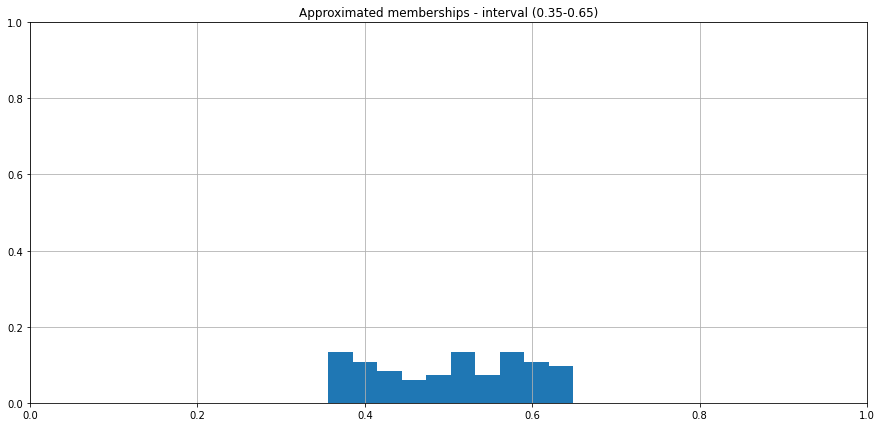

In [36]:
plot_hist([x[0] for x in select_radius(0.15, 0.5)])

plt.title("Approximated memberships - interval (0.35-0.65)")
plt.show()

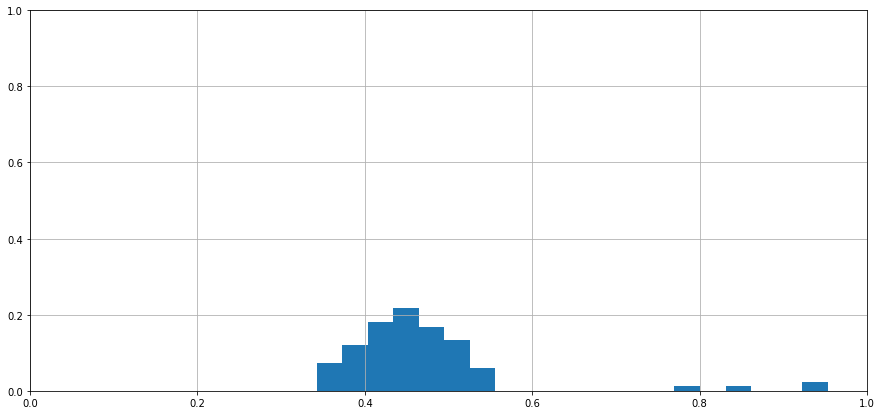

In [58]:
data = [x[1] for x in select_radius(0.15, 0.5)]
plt.figure(figsize=(15, 7))
weights = np.ones_like(data)/float(len(data))
binwidth = (max(data) - min(data)) / 10
plt.hist(data, bins=20, weights=weights)
plt.ylim(0,1)
plt.xlim(0,1)
plt.grid()

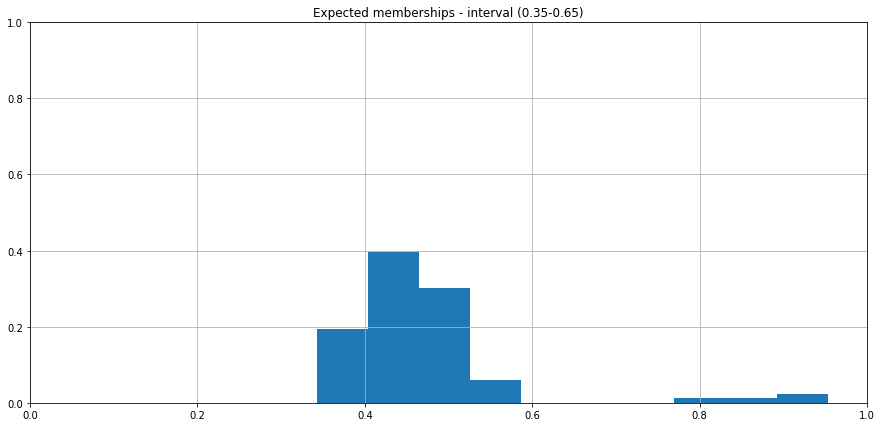

In [38]:
plot_hist([x[1] for x in select_radius(0.15, 0.5)])

plt.title("Expected memberships - interval (0.35-0.65)")
plt.show()

In [39]:
topic_1 = pd.read_csv("topic_samples/topic_1.csv", header=None)
topic_2 = pd.read_csv("topic_samples/topic_2.csv", header=None)

topic_1_mixed = pd.read_csv("topic_samples/topic_1_mixed.csv", header=None)
topic_2_mixed = pd.read_csv("topic_samples/topic_2_mixed.csv", header=None)

In [40]:
topic_1_words = set(topic_1[0].values[0].split(" "))
topic_2_words = set(topic_2[0].values[0].split(" "))

topic_1_words_mixed = set(topic_1_mixed[0].values[0].split(" "))
topic_2_words_mixed = set(topic_2_mixed[0].values[0].split(" "))

In [41]:
len(topic_1_words_mixed.intersection(topic_1_words))/(len(topic_1_words)), len(topic_1_words_mixed.intersection(topic_2_words))/(len(topic_1_words))

(0.8269230769230769, 0.17307692307692307)

In [42]:
len(topic_2_words_mixed.intersection(topic_1_words))/(len(topic_2_words)), len(topic_2_words_mixed.intersection(topic_2_words))/(len(topic_2_words))

(0.16666666666666666, 0.8333333333333334)